- Find Over-Fit and Under-Fit
- Cross Validation
- ROC Curve (Receiver Operating Characteristic)
- Dimensionality Reduction
    - Principal Component Analysis (PCA)
    - Linear Discriminant Analysis (LDA)


# Loading Packages and Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

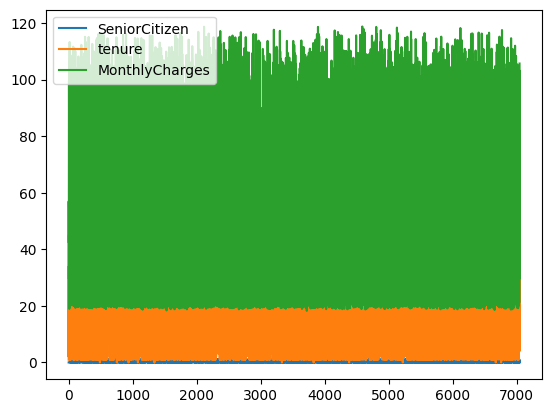

In [9]:
df.plot()

# Encoding

In [10]:
df.drop(columns=['customerID'], inplace=True)

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace({' ': 0, '': 0}).astype(float)

In [12]:
for i in df.select_dtypes(['object']).columns:
    print(i, df[i].unique())
    

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [13]:

from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

for i in df.select_dtypes(['object']).columns:
    df[i] = la.fit_transform(df[i]);
    

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


<Axes: >

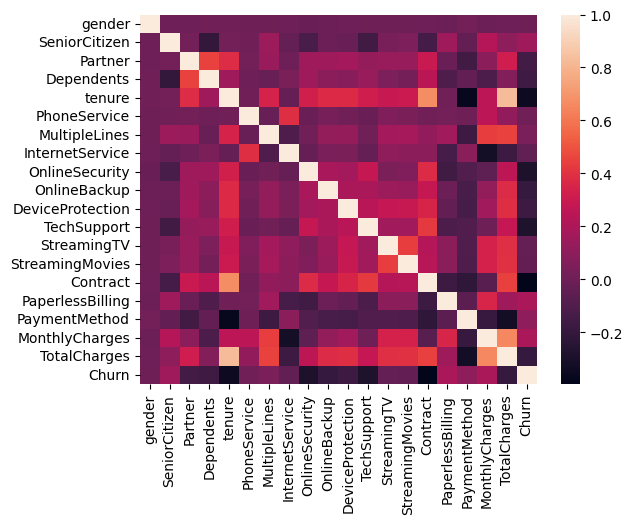

In [15]:
sns.heatmap(df.corr())

# Split the Data

In [16]:
X = df.drop(columns=['Churn'])
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (4930, 19)
X_test:  (2113, 19)
y_train:  (4930,)
y_test:  (2113,)


# Feature Selection

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=5)
X_selector = fs.fit_transform(X,y)

selected_features = X.columns[fs.get_support()]
selected_features

Index(['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'TotalCharges'], dtype='object')

# Model Training

## Linear Model

### Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression_model = linear_regression.fit(X_train, y_train)
linear_regression_model.score(X_test, y_test)

0.29758882066465275

### Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter=5000)
logistic_regression_model = logistic_regression.fit(X_train, y_train)
print("Accuracy: ", logistic_regression_model.score(X_test, y_test))

Accuracy:  0.8106956933270232


### PLA

In [20]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron_model = perceptron.fit(X_train, y_train)
print("Accuracy: ", perceptron_model.score(X_test, y_test))

Accuracy:  0.7581637482252721


## Support Vector Machine (SVM)

### Support Vector Classifier (SVC)

In [21]:
from sklearn.svm import SVC
svc = SVC()
svc_model = svc.fit(X_train, y_train)
print("Accuracy: ", svc_model.score(X_test, y_test))

Accuracy:  0.7283483199242783


## Tree

### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree_model = decision_tree.fit(X_train, y_train)
print("Accuracy: ", decision_tree_model.score(X_test, y_test))

Accuracy:  0.7292948414576431


## Ensemble Learning

### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest_model = random_forest.fit(X_train, y_train)
print("Accuracy: ", random_forest_model.score(X_test, y_test))

Accuracy:  0.7908187411263606


## Neighbors

### K-Neighbors Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors=KNeighborsClassifier()
k_neighbors_model = k_neighbors.fit(X_train, y_train)
print("Accuracy: ", k_neighbors_model.score(X_test, y_test))

Accuracy:  0.7714150496923805


## Neural Network

### MLP Classifier


In [25]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=300,random_state=42)
mlp_model = mlp.fit(X_train, y_train)
print("Accuracy: ", mlp_model.score(X_test, y_test))

Accuracy:  0.7946048272598202


## Naive Bayes 

### GaussianNB

In [26]:
from sklearn.naive_bayes import GaussianNB

gaussian_v_b = GaussianNB()
gaussian_v_b_model = gaussian_v_b.fit(X_train, y_train)
print("Accuracy: ", gaussian_v_b_model.score(X_test, y_test))

Accuracy:  0.7543776620918126


## Cluster

### K-Means 

In [27]:
from sklearn.cluster import KMeans

k_means=KMeans(n_clusters=3,random_state=42)
k_means_model = k_means.fit(X_train, y_train)
print("Accuracy: ", k_means_model.score(X_test, y_test))

Accuracy:  -1102934563.1242912


# Accuracy, Fit and Cross-Validation

In [28]:
from sklearn.model_selection import cross_val_score

def ModelAccuracyAndFit(model, X_train, X_test, y_train, y_test):
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)

    training_accuracy = trained_model.score(X_train, y_train)
    testing_accuracy = trained_model.score(X_test, y_test)
    
    print("Model Accuracy: ", testing_accuracy)
    print("Model Fit: ", training_accuracy - testing_accuracy)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation
    print("Cross-Validation Scores:", cv_scores,"\n\n")
    # sns.heatmap(cv_scores.reshape(1, -1))

    
ModelAccuracyAndFit(linear_regression, X_train, X_test, y_train, y_test)
ModelAccuracyAndFit(perceptron_model, X_train, X_test, y_train, y_test)
ModelAccuracyAndFit(svc_model, X_train, X_test, y_train, y_test)

ModelAccuracyAndFit(logistic_regression, X_train, X_test, y_train, y_test)
ModelAccuracyAndFit(decision_tree, X_train, X_test, y_train, y_test)
ModelAccuracyAndFit(random_forest, X_train, X_test, y_train, y_test)

ModelAccuracyAndFit(k_neighbors, X_train, X_test, y_train, y_test)
ModelAccuracyAndFit(mlp, X_train, X_test, y_train, y_test)
ModelAccuracyAndFit(gaussian_v_b, X_train, X_test, y_train, y_test)

ModelAccuracyAndFit(k_means_model, X_train, X_test, y_train, y_test)



Model Accuracy:  0.29758882066465275
Model Fit:  -0.03314599499160775
Cross-Validation Scores: [0.27456111 0.26001831 0.25967193 0.24065528 0.24851031] 


Model Accuracy:  0.7581637482252721
Model Fit:  -0.0017742958926149077
Cross-Validation Scores: [0.76774848 0.26267748 0.7484787  0.26267748 0.76064909] 


Model Accuracy:  0.7283483199242783
Model Fit:  0.008974195288703468
Cross-Validation Scores: [0.73732252 0.73732252 0.73732252 0.73732252 0.73732252] 


Model Accuracy:  0.8106956933270232
Model Fit:  -0.0074502572215464635
Cross-Validation Scores: [0.81338742 0.80527383 0.78701826 0.79208925 0.80730223] 


Model Accuracy:  0.7335541883577852
Model Fit:  0.2648230935894764
Cross-Validation Scores: [0.72616633 0.74239351 0.7505071  0.72920892 0.73935091] 


Model Accuracy:  0.7941315664931378
Model Fit:  0.20404287569753166
Cross-Validation Scores: [0.79107505 0.79614604 0.78701826 0.78498986 0.77789047] 


Model Accuracy:  0.7714150496923805
Model Fit:  0.05880807403987098
Cross-

# Report

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def ModelReport(model, X_train, X_test, y_train, y_test):
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)
    
    if hasattr(model, "predict_proba"):  # Check if it's a classification model
        report = classification_report(y_test, y_pred)
        print("Classification Report:")
        print(report + "\n\n")
    else: 
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("Regression Metrics:")
        print(f"Mean Absolute Error: {mae}")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}\n\n")

ModelReport(linear_regression, X_train, X_test, y_train, y_test) # Regression
ModelReport(perceptron_model, X_train, X_test, y_train, y_test) # Regression
ModelReport(svc_model, X_train, X_test, y_train, y_test) # Regression

ModelReport(logistic_regression, X_train, X_test, y_train, y_test) # Classification
ModelReport(decision_tree, X_train, X_test, y_train, y_test) # Classification
ModelReport(random_forest, X_train, X_test, y_train, y_test) # Classification

ModelReport(k_neighbors, X_train, X_test, y_train, y_test) # Classification
ModelReport(mlp, X_train, X_test, y_train, y_test) # Classification
ModelReport(gaussian_v_b, X_train, X_test, y_train, y_test) # Classification

ModelReport(k_means_model, X_train, X_test, y_train, y_test) # Regression



Regression Metrics:
Mean Absolute Error: 0.3005646098464793
Mean Squared Error: 0.13897700016917675
R-squared: 0.29758882066465275


Regression Metrics:
Mean Absolute Error: 0.24183625177472787
Mean Squared Error: 0.24183625177472787
R-squared: -0.22227769061316338


Regression Metrics:
Mean Absolute Error: 0.2716516800757217
Mean Squared Error: 0.2716516800757217
R-squared: -0.372969460688759


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1539
           1       0.51      0.49      0.50       574

    accuracy                           0.73      2113
   macro

# Confusion Matrix

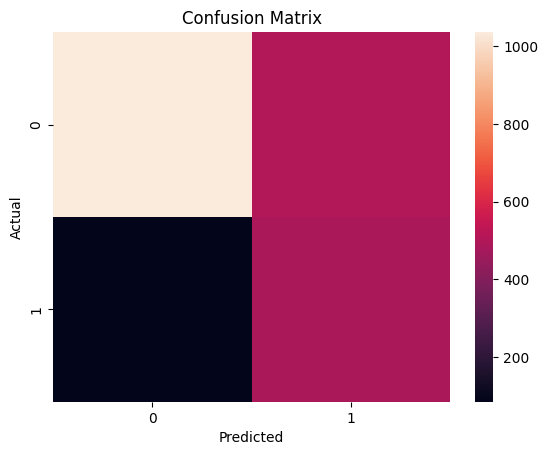

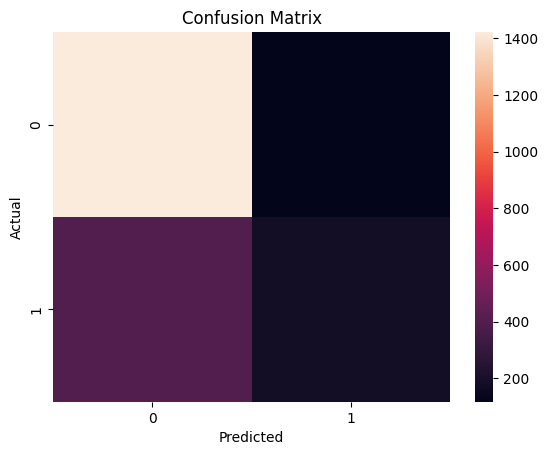

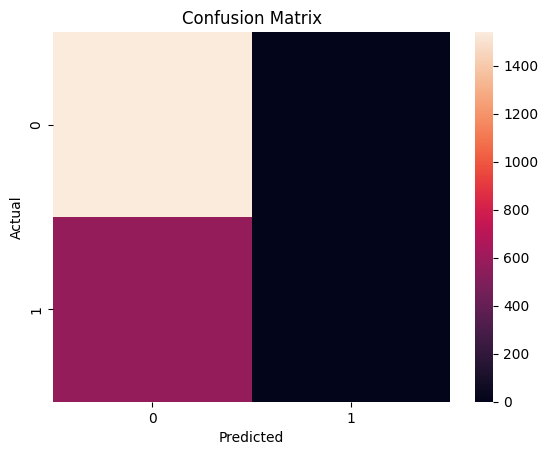

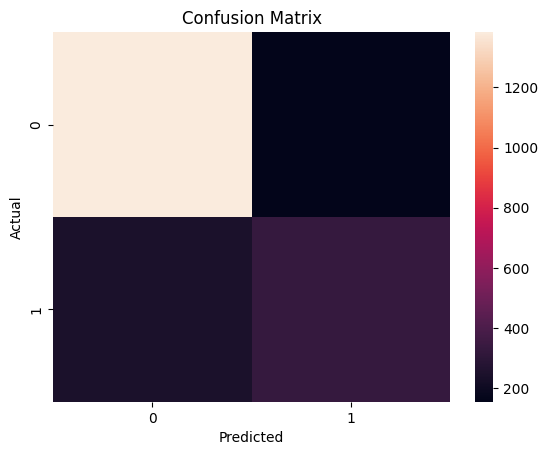

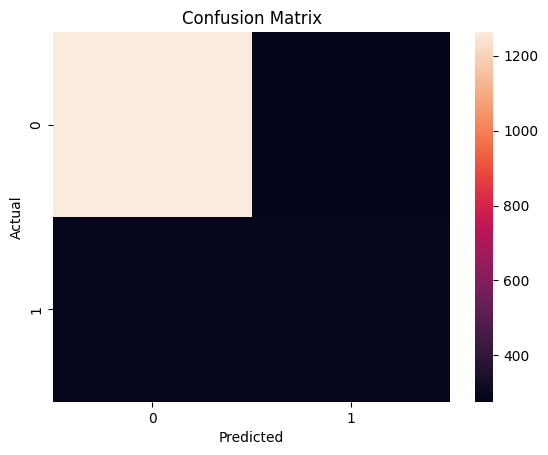

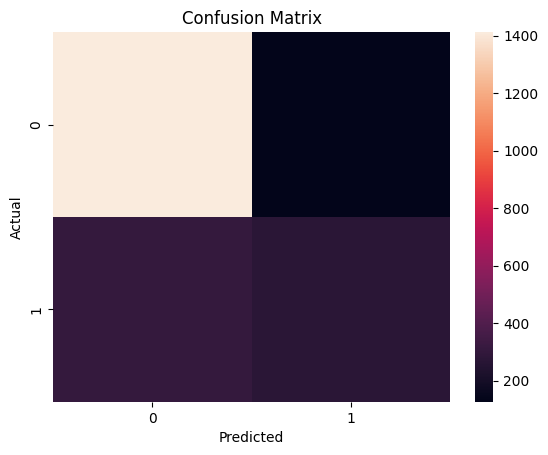

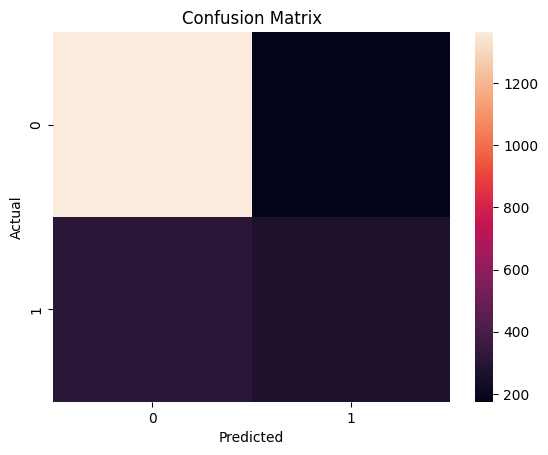

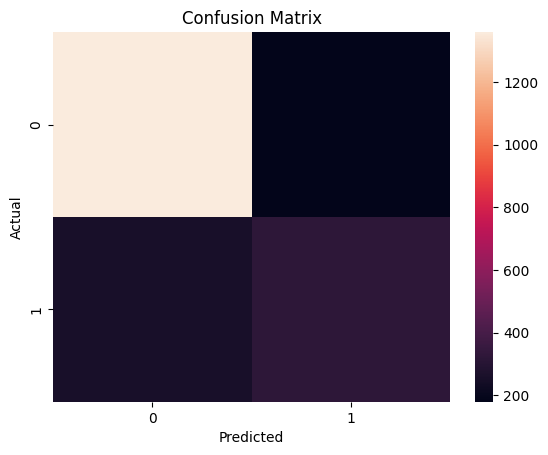

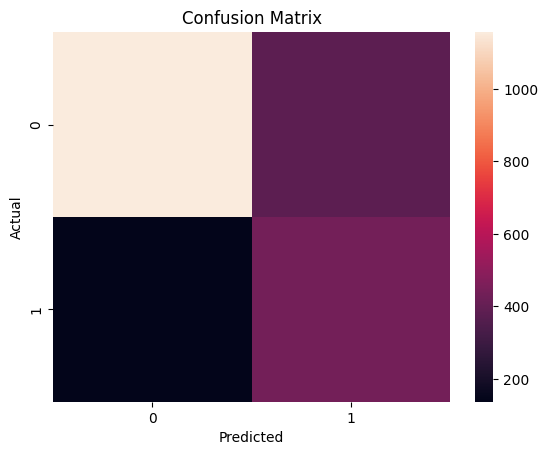

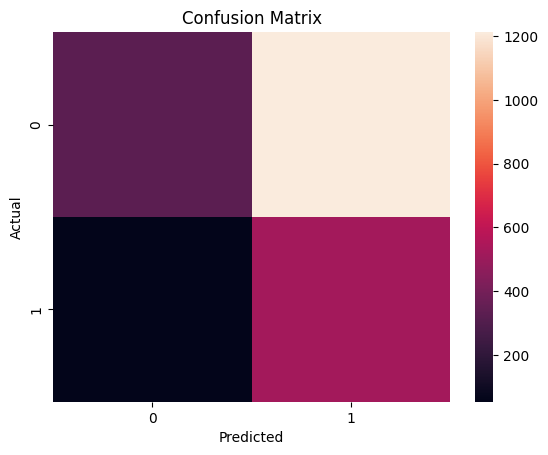

In [30]:
from sklearn.metrics import confusion_matrix

def ConfusionMatrix(model, X_train, X_test, y_train, y_test):
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)

    threshold = y_test.mean()
    y_test_class = (y_test > threshold).astype(int)
    y_pred_class = (y_pred > threshold).astype(int)

    cm = confusion_matrix(y_test_class, y_pred_class)
    sns.heatmap(cm)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

ConfusionMatrix(linear_regression, X_train, X_test, y_train, y_test)
ConfusionMatrix(perceptron_model, X_train, X_test, y_train, y_test)
ConfusionMatrix(svc_model, X_train, X_test, y_train, y_test)

ConfusionMatrix(logistic_regression, X_train, X_test, y_train, y_test)
ConfusionMatrix(decision_tree, X_train, X_test, y_train, y_test)
ConfusionMatrix(random_forest, X_train, X_test, y_train, y_test)

ConfusionMatrix(k_neighbors, X_train, X_test, y_train, y_test)
ConfusionMatrix(mlp, X_train, X_test, y_train, y_test)
ConfusionMatrix(gaussian_v_b, X_train, X_test, y_train, y_test)

ConfusionMatrix(k_means_model, X_train, X_test, y_train, y_test)



# Principal Component Analysis (PCA) is a dimensionality reduction technique

In [31]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

def ModelUsingPCA(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pca = PCA(n_components=2)
    
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    model.fit(X_train_pca, y_train)
    
    y_pred = model.predict(X_test_pca)
    
    accuracy = model.score(X_test_pca, y_test)
    print("Accuracy:", accuracy)

ModelUsingPCA(linear_regression, X, y)
ModelUsingPCA(perceptron_model, X, y)
ModelUsingPCA(svc_model, X, y)

ModelUsingPCA(logistic_regression, X, y)
ModelUsingPCA(decision_tree, X, y)
ModelUsingPCA(random_forest, X, y)

ModelUsingPCA(k_neighbors, X, y)
ModelUsingPCA(mlp, X, y)
ModelUsingPCA(gaussian_v_b, X, y)

ModelUsingPCA(k_means_model, X, y)



Accuracy: 0.2592165039206421
Accuracy: 0.5308729595457772
Accuracy: 0.7352732434350603
Accuracy: 0.7977288857345636
Accuracy: 0.7295954577714692
Accuracy: 0.7679205110007097
Accuracy: 0.7806955287437899
Accuracy: 0.7345635202271115
Accuracy: 0.7877927608232789
Accuracy: -747025337.9314957


# ROC Curve

ROC AUC score: 0.8497417889801288


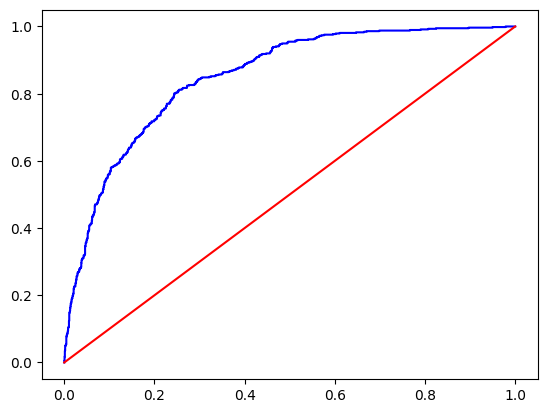

ROC AUC score: 0.6193289230302494


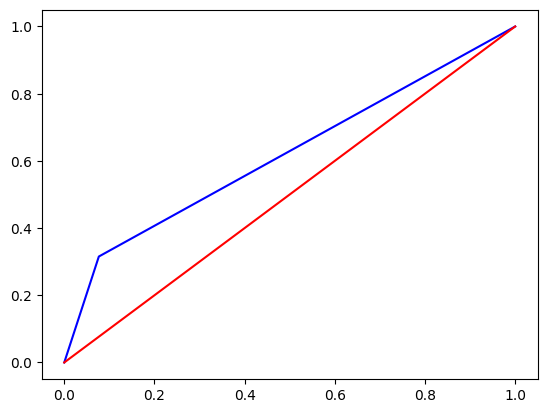

ROC AUC score: 0.5


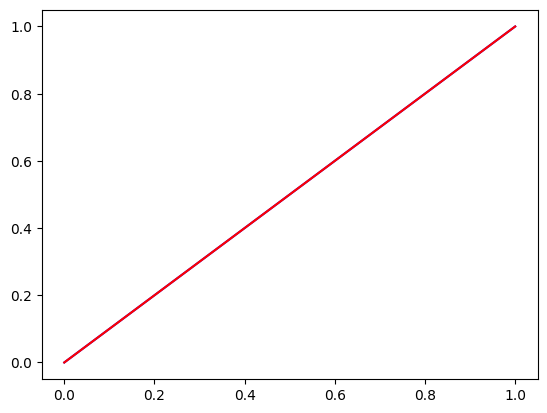

ROC AUC score: 0.73622799093488


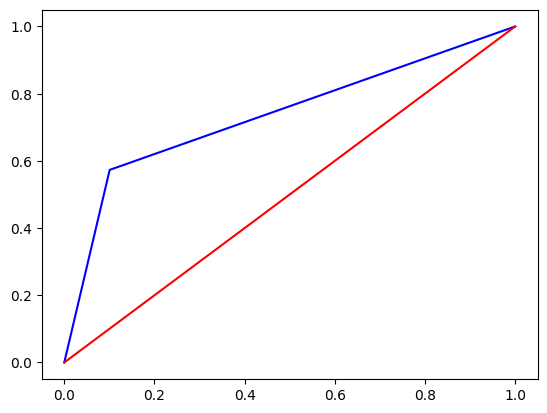

ROC AUC score: 0.6566257558983276


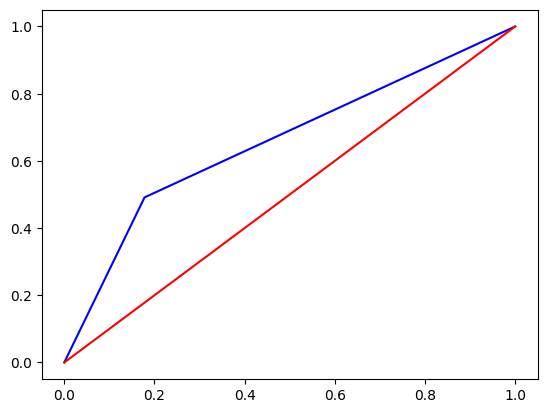

ROC AUC score: 0.6897969856891552


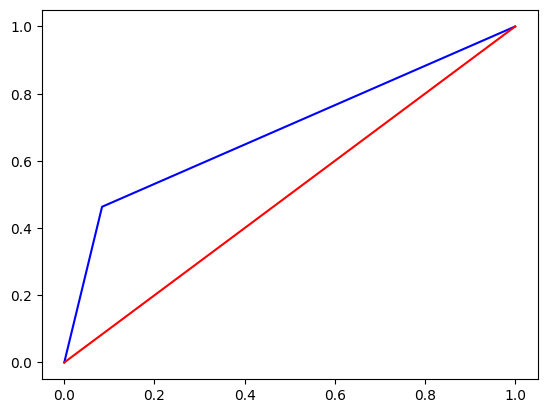

ROC AUC score: 0.6748522163584209


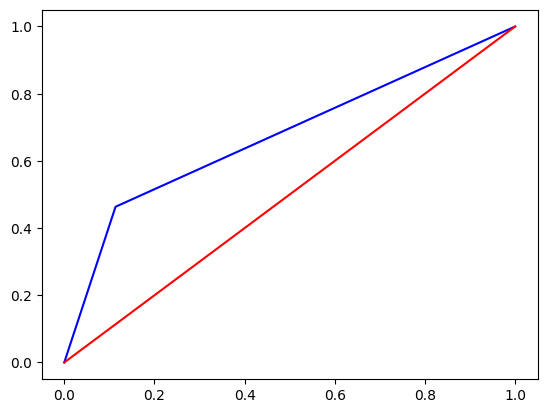

ROC AUC score: 0.7202661124355605


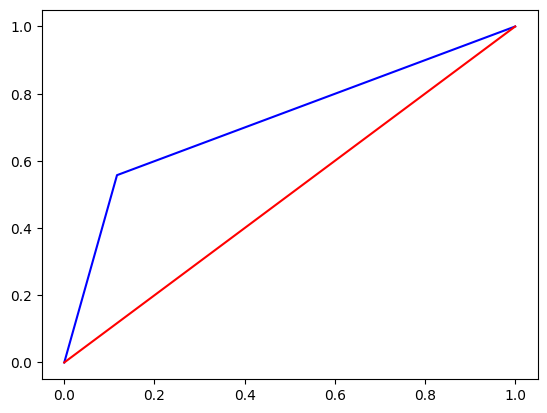

ROC AUC score: 0.7565554582028694


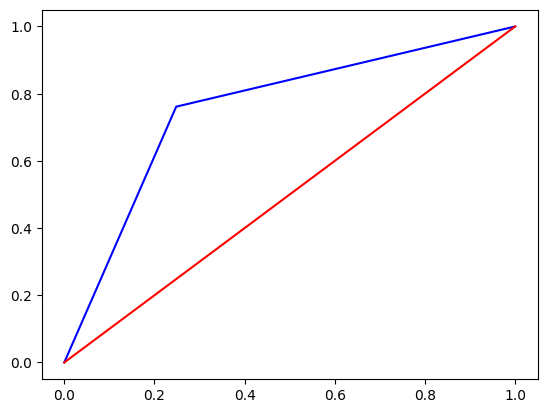

ROC AUC score: 0.5210581784180415


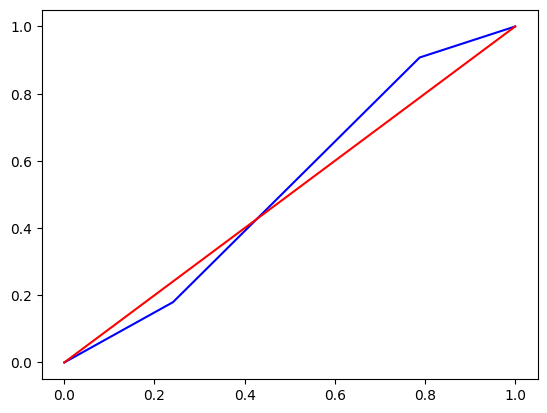

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def ROCCurve(model, X_train, X_test, y_train, y_test):
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)
    
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    print(f'ROC AUC score: {roc_auc}')
    
    plt.plot(fpr, tpr, color='b')
    plt.plot([0, 1], [0, 1], color='r')
    plt.show()

ROCCurve(linear_regression, X_train, X_test, y_train, y_test)
ROCCurve(perceptron_model, X_train, X_test, y_train, y_test)
ROCCurve(svc_model, X_train, X_test, y_train, y_test)
ROCCurve(logistic_regression, X_train, X_test, y_train, y_test)
ROCCurve(decision_tree, X_train, X_test, y_train, y_test)
ROCCurve(random_forest, X_train, X_test, y_train, y_test)
ROCCurve(k_neighbors, X_train, X_test, y_train, y_test)
ROCCurve(mlp_model, X_train, X_test, y_train, y_test)
ROCCurve(gaussian_v_b_model, X_train, X_test, y_train, y_test)
ROCCurve(k_means_model, X_train, X_test, y_train, y_test)
